In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree






















In [4]:
# load a print few lines of dataset
df = pd.read_csv("Steel_industry.csv")

df.head()


,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

In [6]:
#Renaming the column
df = df.rename(columns={"CO2(tCO2)":"CO2"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2                                   35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

In [7]:
#Check for null values
df.isnull().sum().sort_values()

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2                                     0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_Of_Week                             0
Load_Type                               0
dtype: int64

In [8]:
#Check for unique values
df.nunique()

Date_Time                               35040
Usage_kWh                                3344
Lagging_Current_Reactive.Power_kVarh     1954
Leading_Current_Reactive_Power_kVarh      769
CO2                                         8
Lagging_Current_Power_Factor             5079
Leading_Current_Power_Factor             3366
NSM                                        96
WeekStatus                                  2
Day_Of_Week                                 7
Load_Type                                   3
dtype: int64

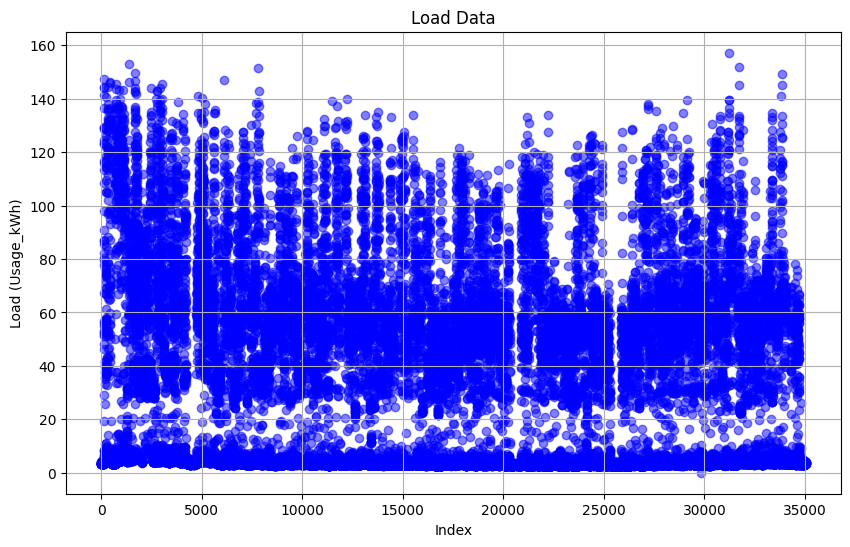

In [9]:
# Scatter plot of Load (Usage_kWh)
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Usage_kWh'], alpha=0.5, c='b', marker='o')
plt.title('Load Data')
plt.xlabel('Index')
plt.ylabel('Load (Usage_kWh)')
plt.grid(True)
plt.show()



In [10]:
# Define function to get status of the day
def get_week_status(day):
    if day in ["Monday","Tuesday","Wednesday","Thursday","Friday"]:
        return "Weekday"
    elif day in ["Saturday","Sunday"]:
        return "Weekend"
    else: "unknown"
# Add Weekstatus column derived from column Day_Of_Week 
df["Weekstatus"]=df["Day_Of_Week"].apply(get_week_status)
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type,Weekstatus
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,Weekday
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,Weekday
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,Weekday
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,Weekday
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,Weekday


In [11]:
#Subset the numeric features for correlation 
numeric_df = df.select_dtypes(include=['float64', 'int64'])
#The feature correlation
numeric_df.corr()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896151,-0.324941,0.988180,0.385932,0.353583,0.234581
Lagging_Current_Reactive.Power_kVarh,0.896151,1.000000,-0.405160,0.886949,0.144507,0.407735,0.082633
Leading_Current_Reactive_Power_kVarh,-0.324941,-0.405160,1.000000,-0.332796,0.526791,-0.944046,0.371645
CO2,0.988180,0.886949,-0.332796,1.000000,0.379575,0.360037,0.231696
Lagging_Current_Power_Factor,0.385932,0.144507,0.526791,0.379575,1.000000,-0.519988,0.565284
Leading_Current_Power_Factor,0.353583,0.407735,-0.944046,0.360037,-0.519988,1.000000,-0.360604
NSM,0.234581,0.082633,0.371645,0.231696,0.565284,-0.360604,1.000000


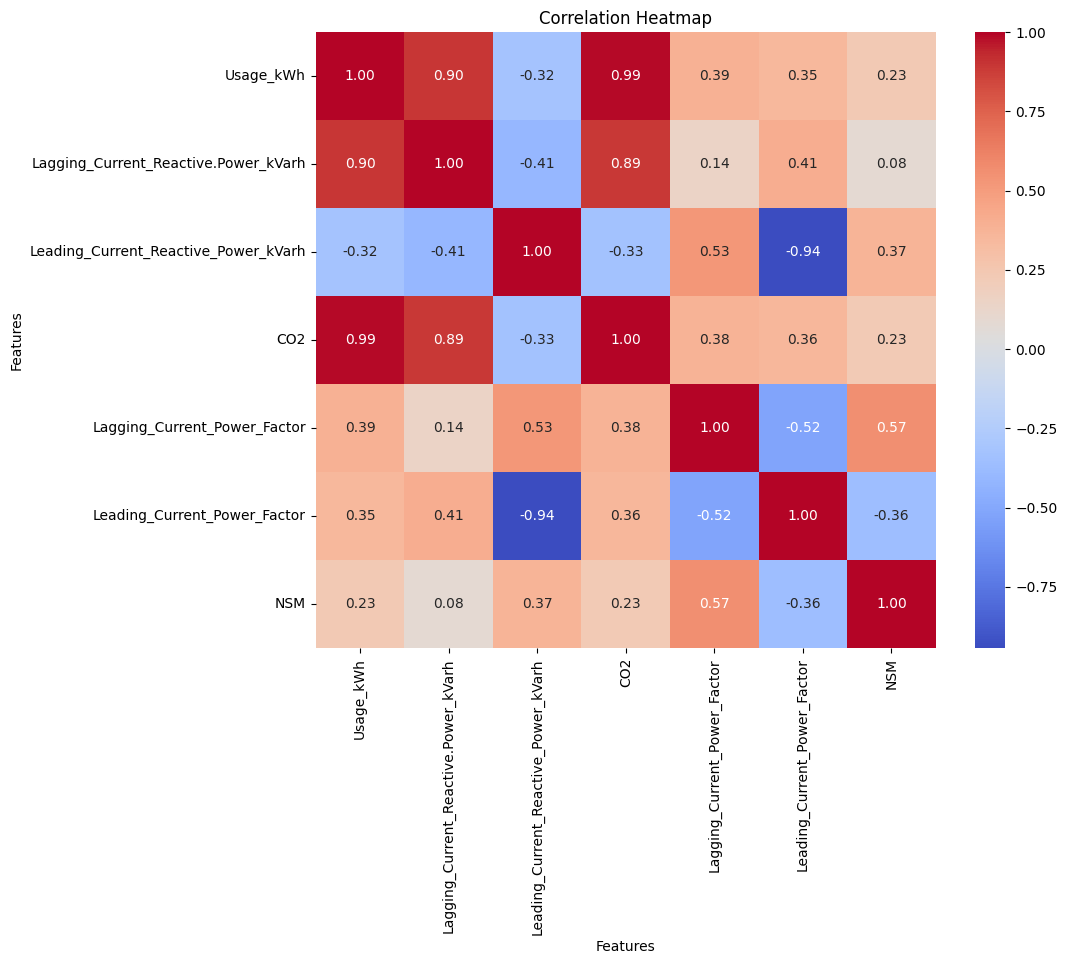

In [12]:
# Create a heatmap of correlation
plt.figure(figsize=(10, 8))  
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# Add labels and title
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [13]:
# Data transformation, transform the nominal categorical features to numerical
category = df.select_dtypes(include = "object").columns

le = preprocessing.LabelEncoder()
df[category] = df[category].apply(le.fit_transform)
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type,Weekstatus
0,1,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0
1,2,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0
2,3,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0
3,4,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0
4,5,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0


In [14]:
# Check the correcaltion of features now all with numerical values
df.corr()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type,Weekstatus
Date_Time,1.000000,-0.011127,-0.013209,-0.013550,-0.003381,0.024522,0.005441,0.002797,-0.008960,0.007842,0.015533,-0.008960
Usage_kWh,-0.011127,1.000000,0.896151,-0.324941,0.988180,0.385932,0.353583,0.234581,-0.295459,0.039884,0.444102,-0.295459
Lagging_Current_Reactive.Power_kVarh,-0.013209,0.896151,1.000000,-0.405160,0.886949,0.144507,0.407735,0.082633,-0.319851,0.043801,0.249690,-0.319851
Leading_Current_Reactive_Power_kVarh,-0.013550,-0.324941,-0.405160,1.000000,-0.332796,0.526791,-0.944046,0.371645,0.260372,-0.019845,0.223484,0.260372
CO2,-0.003381,0.988180,0.886949,-0.332796,1.000000,0.379575,0.360037,0.231696,-0.290450,0.036255,0.437752,-0.290450
Lagging_Current_Power_Factor,0.024522,0.385932,0.144507,0.526791,0.379575,1.000000,-0.519988,0.565284,0.054062,0.001568,0.559355,0.054062
Leading_Current_Power_Factor,0.005441,0.353583,0.407735,-0.944046,0.360037,-0.519988,1.000000,-0.360604,-0.314615,0.021163,-0.131319,-0.314615
NSM,0.002797,0.234581,0.082633,0.371645,0.231696,0.565284,-0.360604,1.000000,-0.000021,-0.000033,0.593001,-0.000021
WeekStatus,-0.008960,-0.295459,-0.319851,0.260372,-0.290450,0.054062,-0.314615,-0.000021,1.000000,-0.156061,-0.203288,1.000000
Day_Of_Week,0.007842,0.039884,0.043801,-0.019845,0.036255,0.001568,0.021163,-0.000033,-0.156061,1.000000,0.012707,-0.156061


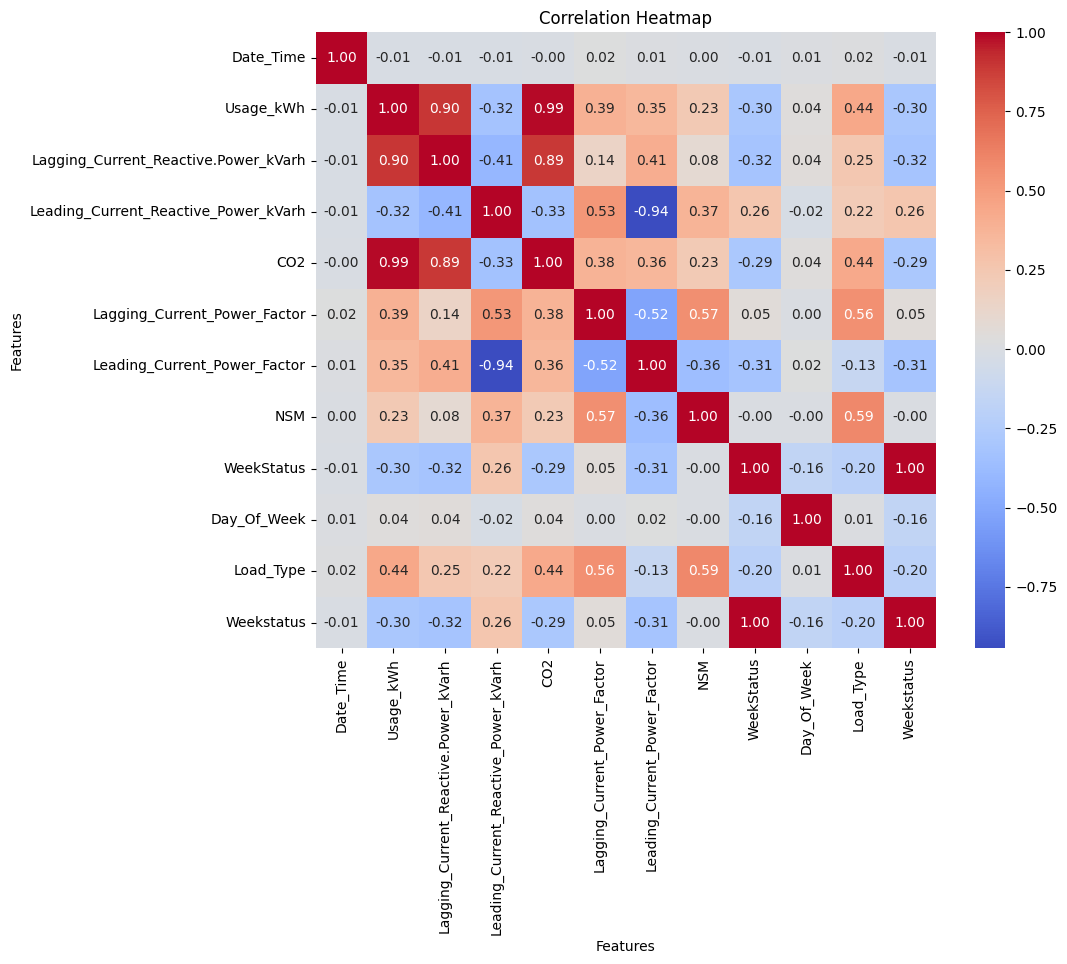

In [15]:
# Create a heatmap of correlation
plt.figure(figsize=(10, 8))  
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# Add labels and title
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
# Show the plot
plt.show()

In [16]:
# Splitting the dataset and creating variables for the classification models
X = df.drop(["Load_Type"], axis=1)
y = df["Load_Type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
results = []
scaler = StandardScaler()
#store name of models used
names = [
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "CatBoostClassifier",
    "RandomForestClassifier"
]



In [17]:
# create a dict of models and loop through them while storing/printing the results

models = {"Logistic Regression" : LogisticRegression(), "KNN" : KNeighborsClassifier(), "Decision Tree" : DecisionTreeClassifier(), "CatBoostClassifier" : CatBoostClassifier(loss_function="MultiClass", eval_metric="Accuracy", verbose=False, iterations=100),
          "RandomForestClassifier" : RandomForestClassifier()}

for model in models.values():
    
    pipeline = make_pipeline(scaler, model)
    pipeline.fit(X_train, y_train)
    result = pipeline.score(X_test, y_test)
    results.append(result)
    print("Model :", model)
    print("The score :", result)

results_df = pd.DataFrame(zip(names,results), columns=["Classifier", "Accuracy"])

Model : LogisticRegression()
The score : 0.7501426777765096
Model : KNeighborsClassifier()
The score : 0.8352927747973976
Model : DecisionTreeClassifier()
The score : 0.9379066316630522
Model : <catboost.core.CatBoostClassifier object at 0x0000020FA8C3F260>
The score : 0.9356237872388997
Model : RandomForestClassifier()
The score : 0.936765209450976


In [18]:
#List and sort results
results_df = results_df.sort_values(by='Accuracy',ascending=False)
results_df

,Classifier,Accuracy
2,Decision Tree,0.937907
4,RandomForestClassifier,0.936765
3,CatBoostClassifier,0.935624
1,KNN,0.835293
0,Logistic Regression,0.750143


In [19]:
# Define the parameters grid for DecisionTreeClassifier
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

In [20]:
# Create the pipeline for DecisionTreeClassifier
pipeline_dt = make_pipeline(scaler, DecisionTreeClassifier())

# Instantiate GridSearchCV for DecisionTreeClassifier
grid_search_dt = GridSearchCV(pipeline_dt, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search_dt.fit(X_train, y_train)

# Get the best parameters and best score for DecisionTreeClassifier
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for DecisionTreeClassifier:", best_params_dt)
print("Best Score for DecisionTreeClassifier:", best_score_dt)

# Evaluate the best DecisionTreeClassifier model on the test set
best_model_dt = grid_search_dt.best_estimator_
test_score_dt = best_model_dt.score(X_test, y_test)
print("Test Score for DecisionTreeClassifier:", test_score_dt)

# Create a DataFrame to store the results
scores_df = pd.DataFrame(columns=["Classifier", "Accuracy"])

result_dt = pd.DataFrame([["Decision Tree", test_score_dt]], columns=["Classifier", "Accuracy"])

# Check if results_df is empty
if results_df.empty:
    results_df = result_dt
else:
    results_df = pd.concat([results_df, result_dt], ignore_index=True)

print(results_df)

Best Parameters for DecisionTreeClassifier: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Best Score for DecisionTreeClassifier: 0.9329528158295283
Test Score for DecisionTreeClassifier: 0.9384773427690903
               Classifier  Accuracy
0           Decision Tree  0.937907
1  RandomForestClassifier  0.936765
2      CatBoostClassifier  0.935624
3                     KNN  0.835293
4     Logistic Regression  0.750143
5           Decision Tree  0.938477


In [21]:
y_pred = grid_search_dt.predict(X_test)
print(y_pred)

[1 1 2 ... 0 1 0]


<Axes: xlabel='Predicted', ylabel='Actual'>

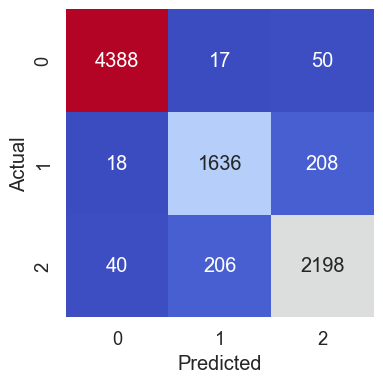

In [22]:
# Confusion matrix results

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (4,4))
sns.set(font_scale=1.2)#for label size

sns.heatmap(df_cm, annot=True,cbar=False, square=True, cmap='coolwarm', fmt="d")

In [23]:
#
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4455
           1       0.88      0.88      0.88      1862
           2       0.89      0.90      0.90      2444

    accuracy                           0.94      8761
   macro avg       0.92      0.92      0.92      8761
weighted avg       0.94      0.94      0.94      8761

